In [2]:
import gzip
import os
import numpy as np
import csv
import pandas as pd
from os import listdir
from os.path import isfile, join

In [3]:
!cd /home/m1deng/GSE67835_Processing
!mkdir -p RAW
!tar -xvf GSE67835_RAW.tar -C RAW

GSM1657871_1772078217.C03.csv.gz
GSM1657872_1772078217.C04.csv.gz
GSM1657873_1772078217.C06.csv.gz
GSM1657874_1772078217.C07.csv.gz
GSM1657875_1772078217.C08.csv.gz
GSM1657876_1772078217.C09.csv.gz
GSM1657877_1772078217.C14.csv.gz
GSM1657878_1772078217.C16.csv.gz
GSM1657879_1772078217.C17.csv.gz
GSM1657880_1772078217.C18.csv.gz
GSM1657881_1772078217.C20.csv.gz
GSM1657882_1772078217.C23.csv.gz
GSM1657883_1772078217.C28.csv.gz
GSM1657884_1772078217.C29.csv.gz
GSM1657885_1772078217.C32.csv.gz
GSM1657886_1772078217.C33.csv.gz
GSM1657887_1772078217.C39.csv.gz
GSM1657888_1772078217.C40.csv.gz
GSM1657889_1772078217.C47.csv.gz
GSM1657890_1772078217.C52.csv.gz
GSM1657891_1772078217.C56.csv.gz
GSM1657892_1772078217.C58.csv.gz
GSM1657893_1772078217.C59.csv.gz
GSM1657894_1772078217.C60.csv.gz
GSM1657895_1772078217.C61.csv.gz
GSM1657896_1772078217.C66.csv.gz
GSM1657897_1772078217.C72.csv.gz
GSM1657898_1772078217.C80.csv.gz
GSM1657899_1772078217.C87.csv.gz
GSM1657900_1772078217.C89.csv.gz
GSM1657901

In [4]:
# 1) Set your dataset name and directories:
data = "GSE67835"

# Base processing directory:
base_dir = "/home/m1deng/GSE67835_Processing"

# RAW folder (where all the .gz files live):
inpath = join(base_dir, "RAW") + "/"
# Output folder (we'll write everything under /home/m1deng/GSE67835_Processing/GSE67835/)
outpath = join(base_dir, data) + "/"

In [5]:
# Create output folder if it doesn't exist
os.makedirs(outpath, exist_ok=True)

# Create RAW folder if it doesn't exist (should already contain the .gz files after untarring)
os.makedirs(inpath, exist_ok=True)

In [6]:
# 2) List all the .gz count files in RAW/:
onlyfiles = [f for f in listdir(inpath) if isfile(join(inpath, f)) and f.endswith(".gz")]


In [7]:
# 3) Read the metadata table:
#    Expecting a column “source_name” (with cell‐type text) and “GEO_Accession (exp)” (sample IDs).
meta = pd.read_csv(join(base_dir, f"{data}_meta.csv"))

# 3) Pull out the sample IDs and the cell_type column directly:
GEO_list       = list(meta["GEO_Accession (exp)"])
celltype_list  = list(meta["cell_type"].astype(str).str.strip())

In [8]:
# 4) Build Sample_Name_list and Cell_type_list by walking through every row:
Cell_type_list = []
Sample_Name_list = []

for idx, sid in enumerate(GEO_list):
    sid_clean = sid.strip()        # e.g. "GSM1234567"
    Sample_Name_list.append(sid_clean)
    Cell_type_list.append(celltype_list[idx])

N = len(Sample_Name_list)
print("Number of cells identified from metadata:", N)

Number of cells identified from metadata: 466


In [9]:
import os

inpath = "/home/m1deng/GSE67835_Processing/RAW"
# List all .gz files (sorted) and print the first 10
all_gz = sorted(f for f in os.listdir(inpath) if f.endswith(".gz"))
print("First 10 files in RAW/:")
for fn in all_gz[:10]:
    print("   ", fn)
print("Total .gz files:", len(all_gz))

First 10 files in RAW/:
    GSM1657871_1772078217.C03.csv.gz
    GSM1657872_1772078217.C04.csv.gz
    GSM1657873_1772078217.C06.csv.gz
    GSM1657874_1772078217.C07.csv.gz
    GSM1657875_1772078217.C08.csv.gz
    GSM1657876_1772078217.C09.csv.gz
    GSM1657877_1772078217.C14.csv.gz
    GSM1657878_1772078217.C16.csv.gz
    GSM1657879_1772078217.C17.csv.gz
    GSM1657880_1772078217.C18.csv.gz
Total .gz files: 466


In [10]:
import pandas as pd

# 1) Read the metadata
base_dir = "/home/m1deng/GSE67835_Processing"
meta     = pd.read_csv(f"{base_dir}/GSE67835_meta.csv")

# 2) Show the first few rows (just to confirm)
print("Metadata columns: ", list(meta.columns))
display(meta.head())

# 3) Build Sample_Name_list from the "Run" column (these are the SRR IDs)
#    Build Cell_type_list from the "cell_type" column
run_list      = meta["Run"].astype(str).str.strip().tolist()
celltype_list = meta["cell_type"].astype(str).str.strip().tolist()

print(f"Total rows in metadata: {len(meta)}")
print(f"Example Run IDs: {run_list[:5]}")
print(f"Example cell types: {celltype_list[:5]}")

Sample_Name_list = run_list.copy()
Cell_type_list   = celltype_list.copy()

N = len(Sample_Name_list)
print("Number of cells identified from metadata:", N)


Metadata columns:  ['Run', 'AGE', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample', 'Bytes', 'c1_chip_id', 'cell_type', 'Center Name', 'Consent', 'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region', 'Experiment', 'experiment_sample_name', 'GEO_Accession (exp)', 'Instrument', 'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Organism', 'Platform', 'ReleaseDate', 'create_date', 'version', 'Sample Name', 'source_name', 'SRA Study', 'tissue']


,Run,AGE,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,c1_chip_id,cell_type,...,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,tissue
0,SRR1974543,postnatal 54 years,RNA-Seq,150,402035250,PRJNA281204,SAMN03486326,182643998,1772078217,oligodendrocytes,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2015-05-20T00:00:00Z,2015-04-23T15:15:00Z,1,GSM1657871,Brain,SRP057196,cortex
1,SRR1974544,postnatal 54 years,RNA-Seq,150,412908750,PRJNA281204,SAMN03486327,188997062,1772078217,hybrid,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2015-05-20T00:00:00Z,2015-04-23T15:15:00Z,1,GSM1657872,Brain,SRP057196,cortex
2,SRR1974545,postnatal 54 years,RNA-Seq,150,394138350,PRJNA281204,SAMN03486328,180765693,1772078217,oligodendrocytes,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2015-05-20T00:00:00Z,2015-04-23T15:15:00Z,1,GSM1657873,Brain,SRP057196,cortex
3,SRR1974546,postnatal 54 years,RNA-Seq,150,375329850,PRJNA281204,SAMN03486329,176097747,1772078217,hybrid,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2015-05-20T00:00:00Z,2015-04-15T14:05:00Z,1,GSM1657874,Brain,SRP057196,cortex
4,SRR1974547,postnatal 54 years,RNA-Seq,150,311182050,PRJNA281204,SAMN03486330,144000857,1772078217,hybrid,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2015-05-20T00:00:00Z,2015-04-23T15:15:00Z,1,GSM1657875,Brain,SRP057196,cortex


Total rows in metadata: 466
Example Run IDs: ['SRR1974543', 'SRR1974544', 'SRR1974545', 'SRR1974546', 'SRR1974547']
Example cell types: ['oligodendrocytes', 'hybrid', 'oligodendrocytes', 'hybrid', 'hybrid']
Number of cells identified from metadata: 466


In [11]:
import os

inpath = "/home/m1deng/GSE67835_Processing/RAW"
all_gz = sorted(f for f in os.listdir(inpath) if f.endswith(".gz"))

print("First 10 files in RAW/:")
for fn in all_gz[:10]:
    print("   ", fn)
print("Total .gz files:", len(all_gz))


First 10 files in RAW/:
    GSM1657871_1772078217.C03.csv.gz
    GSM1657872_1772078217.C04.csv.gz
    GSM1657873_1772078217.C06.csv.gz
    GSM1657874_1772078217.C07.csv.gz
    GSM1657875_1772078217.C08.csv.gz
    GSM1657876_1772078217.C09.csv.gz
    GSM1657877_1772078217.C14.csv.gz
    GSM1657878_1772078217.C16.csv.gz
    GSM1657879_1772078217.C17.csv.gz
    GSM1657880_1772078217.C18.csv.gz
Total .gz files: 466


In [12]:
import pandas as pd

# Read the metadata
base_dir = "/home/m1deng/GSE67835_Processing"
meta     = pd.read_csv(f"{base_dir}/GSE67835_meta.csv")

# Show the first few rows so you can confirm column names
print("Metadata columns:", list(meta.columns))
display(meta.head())

# Now pull the GEO accession (GSM…) and the cell_type column
geo_list      = meta["GEO_Accession (exp)"].astype(str).str.strip().tolist()
celltype_list = meta["cell_type"].astype(str).str.strip().tolist()

print(f"Total rows in metadata: {len(meta)}")
print("Example GEO IDs:", geo_list[:5])
print("Example cell types:", celltype_list[:5])

# Build your Sample_Name_list and Cell_type_list
Sample_Name_list = geo_list.copy()       # e.g. ["GSM1657871", "GSM1657872", ...]
Cell_type_list   = celltype_list.copy()  # e.g. ["oligodendrocytes", "hybrid", ... ]

N = len(Sample_Name_list)
print("Number of cells identified from metadata:", N)


Metadata columns: ['Run', 'AGE', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample', 'Bytes', 'c1_chip_id', 'cell_type', 'Center Name', 'Consent', 'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region', 'Experiment', 'experiment_sample_name', 'GEO_Accession (exp)', 'Instrument', 'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Organism', 'Platform', 'ReleaseDate', 'create_date', 'version', 'Sample Name', 'source_name', 'SRA Study', 'tissue']


,Run,AGE,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,c1_chip_id,cell_type,...,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,tissue
0,SRR1974543,postnatal 54 years,RNA-Seq,150,402035250,PRJNA281204,SAMN03486326,182643998,1772078217,oligodendrocytes,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2015-05-20T00:00:00Z,2015-04-23T15:15:00Z,1,GSM1657871,Brain,SRP057196,cortex
1,SRR1974544,postnatal 54 years,RNA-Seq,150,412908750,PRJNA281204,SAMN03486327,188997062,1772078217,hybrid,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2015-05-20T00:00:00Z,2015-04-23T15:15:00Z,1,GSM1657872,Brain,SRP057196,cortex
2,SRR1974545,postnatal 54 years,RNA-Seq,150,394138350,PRJNA281204,SAMN03486328,180765693,1772078217,oligodendrocytes,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2015-05-20T00:00:00Z,2015-04-23T15:15:00Z,1,GSM1657873,Brain,SRP057196,cortex
3,SRR1974546,postnatal 54 years,RNA-Seq,150,375329850,PRJNA281204,SAMN03486329,176097747,1772078217,hybrid,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2015-05-20T00:00:00Z,2015-04-15T14:05:00Z,1,GSM1657874,Brain,SRP057196,cortex
4,SRR1974547,postnatal 54 years,RNA-Seq,150,311182050,PRJNA281204,SAMN03486330,144000857,1772078217,hybrid,...,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2015-05-20T00:00:00Z,2015-04-23T15:15:00Z,1,GSM1657875,Brain,SRP057196,cortex


Total rows in metadata: 466
Example GEO IDs: ['GSM1657871', 'GSM1657872', 'GSM1657873', 'GSM1657874', 'GSM1657875']
Example cell types: ['oligodendrocytes', 'hybrid', 'oligodendrocytes', 'hybrid', 'hybrid']
Number of cells identified from metadata: 466


In [13]:
import gzip
import numpy as np
import os
from os import listdir
from os.path import isfile, join

data     = "GSE67835"
base_dir = "/home/m1deng/GSE67835_Processing"
inpath   = join(base_dir, "RAW") + "/"   # where the GSM…*.csv.gz files live
outpath  = join(base_dir, data) + "/"    # where we’ll save the “_full_” outputs
os.makedirs(outpath, exist_ok=True)

# 1) List all .gz files in RAW/
onlyfiles = [f for f in listdir(inpath) if isfile(join(inpath, f)) and f.endswith(".gz")]

# 2) Use the first GSM ID to build gene_list (no header, lines are two‐column whitespace)
first_cell = Sample_Name_list[0]  # e.g. "GSM1657871"
found = False
for fname in onlyfiles:
    if first_cell in fname:
        found = True
        raw_filename = fname
        break
if not found:
    raise FileNotFoundError(f"Cannot find any RAW file containing sample '{first_cell}' in {inpath}")

# 3) Read that .csv.gz in text mode; split on whitespace; build gene_list
gene_list = []
dup_gene  = []
with gzip.open(join(inpath, raw_filename), "rt") as raw_data_file:
    for line in raw_data_file:
        tokens = line.strip().split()
        gene   = tokens[0].upper()
        if gene not in gene_list:
            gene_list.append(gene)
        else:
            dup_gene.append(gene)

print(f"Removed {len(dup_gene)} duplicates; unique genes = {len(gene_list)}")
M = len(gene_list)
print("M (genes) =", M, "   N (cells) =", N)

# 4) Initialize the count matrix (M genes × N cells)
MATRIX = np.zeros((M, N), dtype=float)

# 5) Fill in each column by matching GSM→filename and splitting on whitespace
for idx_cell in range(N):
    sample_id = Sample_Name_list[idx_cell]  # e.g. "GSM1657872"
    found = False
    for fname in onlyfiles:
        if sample_id in fname:
            found = True
            raw_filename = fname
            break
    if not found:
        raise FileNotFoundError(f"Sample '{sample_id}' not found among RAW files in {inpath}")

    with gzip.open(join(inpath, raw_filename), "rt") as raw_data_file:
        idx_gene_read = 0
        for line in raw_data_file:
            tokens    = line.strip().split()
            gene_name = tokens[0].upper()
            count_val = float(tokens[1])
            # Because we built gene_list in the exact same order,
            # we should see gene_name == gene_list[idx_gene_read]
            if gene_name == gene_list[idx_gene_read]:
                MATRIX[idx_gene_read, idx_cell] = count_val
                idx_gene_read += 1
            else:
                raise ValueError(
                    f"Mismatch at cell {idx_cell}, reading line: found '{gene_name}' "
                    f"but expected '{gene_list[idx_gene_read]}'"
                )

        if idx_gene_read != M:
            raise ValueError(
                f"ERROR: After reading sample '{sample_id}', found {idx_gene_read}/{M} genes."
            )

print("✅ Finished constructing the count matrix (shape = [{}, {}])".format(M, N))


Removed 0 duplicates; unique genes = 22088
M (genes) = 22088    N (cells) = 466
✅ Finished constructing the count matrix (shape = [22088, 466])


In [14]:
import csv
from os.path import join

# 1) Determine your unique cell‐type list (sorted):
cell_type_unique = sorted(set(Cell_type_list))
print("Unique cell types:", cell_type_unique)

Unique cell types: ['OPC', 'astrocytes', 'endothelial', 'fetal_quiescent', 'fetal_replicating', 'hybrid', 'microglia', 'neurons', 'oligodendrocytes']


In [15]:
# 2) Build mapping dictionaries
cell_type_dict     = {i: cell_type_unique[i] for i in range(len(cell_type_unique))}
cell_type_dict_rev = {cell_type_unique[i]: i for i in range(len(cell_type_unique))}

In [16]:
# 3) Write label‐dictionary text file
with open(join(outpath, f"{data}_full_labeldict.txt"), "w") as dict_file:
    dict_file.write(str(cell_type_dict) + "\n")
    dict_file.write(str(cell_type_dict_rev) + "\n")
print(f"Wrote → {data}_full_labeldict.txt")

Wrote → GSE67835_full_labeldict.txt


In [17]:
# 4) Build numeric labels for each cell
Cell_label_list = []
cell_count = {ct: 0 for ct in cell_type_unique}
for idx, ct in enumerate(Cell_type_list):
    lbl = cell_type_dict_rev[ct]
    Cell_label_list.append(lbl)
    cell_count[ct] += 1

print("Cell counts by type:")
for ct, count in cell_count.items():
    print(f"  {ct}: {count}")

Cell counts by type:
  OPC: 18
  astrocytes: 62
  endothelial: 20
  fetal_quiescent: 110
  fetal_replicating: 25
  hybrid: 46
  microglia: 16
  neurons: 131
  oligodendrocytes: 38


In [18]:
# 5) Write full_labels.csv (Sample Name, Cell type, Label)
with open(join(outpath, f"{data}_full_labels.csv"), "w", newline="") as labelfile:
    writer = csv.writer(labelfile)
    writer.writerow(["Sample Name", "Cell type", "Label"])
    for i in range(N):
        writer.writerow([Sample_Name_list[i], Cell_type_list[i], Cell_label_list[i]])
print(f"Wrote → {data}_full_labels.csv")

Wrote → GSE67835_full_labels.csv


In [19]:
# 6) Write full_gene.csv (Index, Gene)
with open(join(outpath, f"{data}_full_gene.csv"), "w", newline="") as genefile:
    writer = csv.writer(genefile)
    writer.writerow(["Index", "Gene"])
    for idx, gene in enumerate(gene_list):
        writer.writerow([idx, gene])
print(f"Wrote → {data}_full_gene.csv")

Wrote → GSE67835_full_gene.csv


In [20]:
# 7) Write full_data.csv (sparse triplet: Row, Col, Val)
with open(join(outpath, f"{data}_full_data.csv"), "w", newline="") as tripfile:
    writer = csv.writer(tripfile)
    writer.writerow(["Row", "Col", "Val"])
    for c in range(N):
        for g in range(M):
            if MATRIX[g, c] > 0:
                writer.writerow([g, c, MATRIX[g, c]])
print(f"Wrote → {data}_full_data.csv")

Wrote → GSE67835_full_data.csv


In [21]:
# 8) Write full_X.csv (dense gene × cell matrix)
with open(join(outpath, f"{data}_full_X.csv"), "w", newline="") as fullmat:
    writer = csv.writer(fullmat)
    writer.writerow([None] + Sample_Name_list)
    for g in range(M):
        writer.writerow([gene_list[g]] + MATRIX[g, :].tolist())
print(f"Wrote → {data}_full_X.csv")

print("All files successfully written to:", outpath)

Wrote → GSE67835_full_X.csv
All files successfully written to: /home/m1deng/GSE67835_Processing/GSE67835/


In [22]:
## TEST CLUSTERING ##

In [23]:
import numpy as np
import pandas as pd
import warnings
import os
import sys

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

from clusim.clustering import Clustering
import clusim.sim as sim

# Import your PCA implementation from PCA.py
from PCA import PCA_cal_projections

warnings.filterwarnings("ignore")

In [25]:
def computeClusterScore(y_true, y_pred):
    """
    Compute Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
    between true labels and predicted labels.
    """
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    return ari, nmi

In [26]:
def computeElementCentricScore(y_true, y_pred, alpha=0.9):
    """
    Compute the Element-Centric Score between two clusterings using clusim.
    """
    clustering1 = Clustering().from_membership_list(y_true)
    clustering2 = Clustering().from_membership_list(y_pred)
    return sim.element_sim(clustering1, clustering2, alpha=alpha)

In [27]:
def computeKMeans(X, y, max_state=30):
    """
    Run KMeans clustering on data X (shape: n_samples x n_features) for max_state different random seeds.
    Returns arrays of length max_state: ARI scores, NMI scores, and ECS scores.
    """
    n_clusters = np.unique(y).shape[0]
    X_scaled = StandardScaler().fit_transform(X)

    ARI = np.zeros(max_state)
    NMI = np.zeros(max_state)
    ECS = np.zeros(max_state)

    for state in range(max_state):
        km = KMeans(n_clusters=n_clusters, n_init=150, random_state=state)
        km.fit(X_scaled)
        labels = km.labels_

        ARI[state], NMI[state] = computeClusterScore(y, labels)
        ECS[state] = computeElementCentricScore(y, labels)

    return ARI, NMI, ECS

In [28]:
base_dir = "/home/m1deng/GSE67835_Processing/GSE67835"
full_x_path      = os.path.join(base_dir, "GSE67835_full_X.csv")
full_labels_path = os.path.join(base_dir, "GSE67835_full_labels.csv")

In [29]:
# ---------------------------------------------------------------
# 2) Load the dense gene × cell count matrix
#    - Rows are genes, columns are cell IDs
# ---------------------------------------------------------------

df_full = pd.read_csv(full_x_path, index_col=0)
# Convert to a NumPy array of shape (n_genes, n_cells)
X_raw = df_full.values.astype(float)


In [30]:
# ---------------------------------------------------------------
# 3) Load the true labels
# ---------------------------------------------------------------

labels_df = pd.read_csv(full_labels_path)
y = labels_df["Label"].values  # shape (n_cells,)

In [31]:
# ---------------------------------------------------------------
# 4) 1e4 normalization (since this is UMI count data)
#    Scale each cell so that total counts per cell = 1e4
# ---------------------------------------------------------------

cell_totals = np.sum(X_raw, axis=0)    # sum over genes, for each cell
scaling_factors = 1e4 / cell_totals     # shape (n_cells,)
X_norm_counts = X_raw * scaling_factors  # broadcast → shape (n_genes, n_cells)

In [32]:
# ---------------------------------------------------------------
# 5) Log-transform: log(X + 1)
# ---------------------------------------------------------------

log_X = np.log(X_norm_counts + 1.0)

# ---------------------------------------------------------------
# 6) Zero out very small values (< 1e-6)
# ---------------------------------------------------------------

log_X[log_X < 1e-6] = 0

In [33]:
# ---------------------------------------------------------------
# 7) Filter out low-variance genes (keep top 75% variance)
# ---------------------------------------------------------------

row_variances = np.var(log_X, axis=1)  # variance of each gene across cells
variance_threshold = np.percentile(row_variances, 25)  # bottom 25% cutoff
keep_genes_mask = row_variances >= variance_threshold

X_filtered = log_X[keep_genes_mask, :]  # shape (n_genes_filtered, n_cells)

In [34]:
# ---------------------------------------------------------------
# 8) Filter out cell types (labels) with fewer than 15 cells
# ---------------------------------------------------------------

unique_classes, class_counts = np.unique(y, return_counts=True)
classes_to_remove = unique_classes[class_counts < 15]

cell_keep_mask = ~np.isin(y, classes_to_remove)
X_filtered = X_filtered[:, cell_keep_mask]  # now shape (n_filtered_genes, n_kept_cells)
y_filtered = y[cell_keep_mask]              # shape (n_kept_cells,)

In [35]:
# ---------------------------------------------------------------
# 9) Standardize across genes (zero-mean, unit-variance)
#    We want each gene (row) to have mean 0 and variance 1 across cells.
#    StandardScaler works on rows if we transpose, so we do:
#      X_filtered.T → (n_kept_cells, n_filtered_genes), scale, then transpose back.
# ---------------------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered.T).T  # result shape still (n_filtered_genes, n_kept_cells)


In [36]:
# ---------------------------------------------------------------
# 10) Determine number of clusters for PCA (k = number of unique labels)
# ---------------------------------------------------------------

k = np.unique(y_filtered).shape[0]

In [39]:
# ---------------------------------------------------------------
# 11) PCA dimension reduction using PCA_cal_projections
#     PCA_cal_projections expects input shape (genes, cells) and returns
#     a matrix of shape (genes, k). We then compute the projection matrix TM
#     and project cells → Q (shape: cells × k)
# ---------------------------------------------------------------

# PDM has shape (genes_filtered, k)
PDM = PCA_cal_projections(X_scaled.T, k)  
PDM = np.asarray(PDM)  # ensure it's a NumPy array

# Compute the transformation matrix TM = (PDM^T PDM)^{-1} PDM^T
TM = np.linalg.inv(PDM.T @ PDM) @ PDM.T  # shape (k, genes_filtered)

# Project each cell (columns of X_scaled) onto the PCA subspace:
#   X_scaled.T has shape (n_cells_kept, n_genes_filtered)
Q_pca = X_scaled.T @ TM.T  # shape (n_cells_kept, k)


In [40]:
# ---------------------------------------------------------------
# 12) Run KMeans on the PCA‐reduced data (Q_pca), compute ARI, NMI, ECS
# ---------------------------------------------------------------

ARI_vals, NMI_vals, ECS_vals = computeKMeans(Q_pca, y_filtered, max_state=30)

ARI_mean = ARI_vals.mean()
NMI_mean = NMI_vals.mean()
ECS_mean = ECS_vals.mean()

print("=== PCA + KMeans Clustering Results ===")
print(f"Number of clusters (k): {k}")
print(f"PCA projection shape: {Q_pca.shape}")
print(f"Adjusted Rand Index (mean over 30 inits): {ARI_mean:.4f}")
print(f"Normalized Mutual Info (mean over 30 inits): {NMI_mean:.4f}")
print(f"Element-Centric Score (mean over 30 inits): {ECS_mean:.4f}")

=== PCA + KMeans Clustering Results ===
Number of clusters (k): 9
PCA projection shape: (466, 9)
Adjusted Rand Index (mean over 30 inits): 0.6708
Normalized Mutual Info (mean over 30 inits): 0.7582
Element-Centric Score (mean over 30 inits): 0.6685


In [40]:
## sPCA Clustering ##
from sPCA import SPCA_cal_projections
# from wrapper import ParameterWrapper


In [41]:
def load_X(data_name):
    """
    Loads X from Tests/<data_name>/<data_name>_full_X.csv
    Returns a numpy array of shape (n_genes, n_cells).
    """
    base_dir = os.path.abspath(os.path.dirname(__file__))
    inpath = os.path.join(base_dir, f"Tests/{data_name}/")
    df = pd.read_csv(os.path.join(inpath, f"{data_name}_full_X.csv"), index_col=0)
    return df.values.astype(float)

In [42]:
def load_y(data_name):
    """
    Loads y from Tests/<data_name>/<data_name>_full_labels.csv
    Returns a 1D numpy array of integer labels (length = n_cells).
    """
    base_dir = os.path.abspath(os.path.dirname(__file__))
    inpath = os.path.join(base_dir, f"Tests/{data_name}/")
    df = pd.read_csv(os.path.join(inpath, f"{data_name}_full_labels.csv"))
    return df["Label"].astype(int).values

In [43]:
if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python run_sPCA_clustering.py <DATA_NAME>")
        sys.exit(1)

In [44]:
# Change this to the folder where GSE67835_full_X.csv and GSE67835_full_labels.csv are:
BASE_DIR = "/home/m1deng/GSE67835_Processing/GSE67835"

full_x_path      = os.path.join(BASE_DIR, "GSE67835_full_X.csv")
full_labels_path = os.path.join(BASE_DIR, "GSE67835_full_labels.csv")

In [45]:
# -----------------------------------------------------------------------------
# 2) Load the dense gene × cell matrix and labels
# -----------------------------------------------------------------------------

df_full = pd.read_csv(full_x_path, index_col=0)
X_raw   = df_full.values.astype(float)      # shape: (n_genes, n_cells)

labels_df = pd.read_csv(full_labels_path)
y = labels_df["Label"].values              # shape: (n_cells,)


In [46]:
# -----------------------------------------------------------------------------
# 3) Normalize UMI counts to 1e4 per cell, then log-transform
# -----------------------------------------------------------------------------

cell_totals    = np.sum(X_raw, axis=0)       # sum over genes for each cell
scaling_factors = 1e4 / cell_totals          # shape: (n_cells,)
X_norm_counts  = X_raw * scaling_factors     # (n_genes × n_cells)

log_X = np.log(X_norm_counts + 1.0)
log_X[log_X < 1e-6] = 0

In [47]:
# -----------------------------------------------------------------------------
# 4) Filter out low-variance genes (keep top 75% variance)
# -----------------------------------------------------------------------------

row_variances    = np.var(log_X, axis=1)              # variance per gene
variance_cutoff  = np.percentile(row_variances, 25)   # bottom 25% threshold
keep_mask        = row_variances >= variance_cutoff
X_filtered       = log_X[keep_mask, :]                 # (n_filtered_genes, n_cells)


In [48]:
# -----------------------------------------------------------------------------
# 5) Remove any cell‐type labels with fewer than 15 cells
# -----------------------------------------------------------------------------

unique_classes, class_counts = np.unique(y, return_counts=True)
classes_to_remove = unique_classes[class_counts < 15]
cell_keep_mask   = ~np.isin(y, classes_to_remove)

X_filtered = X_filtered[:, cell_keep_mask]   # (n_filtered_genes, kept_cells)
y_filtered = y[cell_keep_mask]               # (kept_cells,)

In [49]:
# -----------------------------------------------------------------------------
# 6) Standardize across genes (zero‐mean, unit‐variance)
# -----------------------------------------------------------------------------

scaler    = StandardScaler()
X_scaled  = scaler.fit_transform(X_filtered.T).T  # back to (genes, cells)


In [69]:
# -----------------------------------------------------------------------------
# 7) Number of clusters = number of unique labels
# -----------------------------------------------------------------------------

k = np.unique(y_filtered).shape[0]

In [73]:
# ---------------------------------------------------------------
# 8) Manually set beta for sPCA
# ---------------------------------------------------------------

beta = 700
print("Using beta =", beta)

# ---------------------------------------------------------------
# 9) Run sPCA and project
# ---------------------------------------------------------------

# SPCA_cal_projections expects input shape (cells, genes_filtered)
PDM = SPCA_cal_projections(X_scaled.T, beta, k)   # returns (kept_cells, k)
PDM = np.asarray(PDM)

TM = np.linalg.inv(PDM.T @ PDM) @ PDM.T            # (k, kept_cells)
Q_spca = X_scaled.T @ TM.T                         # (kept_cells, k)


Using beta = 700


In [74]:
# -----------------------------------------------------------------------------
# 10) Run KMeans on the sPCA embedding and compute ARI, NMI, ECS
# -----------------------------------------------------------------------------

ARI_vals, NMI_vals, ECS_vals = computeKMeans(Q_spca, y_filtered, max_state=30)

print("=== sPCA + KMeans Clustering Results ===")
print(f"Number of clusters (k): {k}")
print(f"sPCA embedding shape: {Q_spca.shape}")
print(f"Adjusted Rand Index (mean over 30 runs): {ARI_vals.mean():.4f}")
print(f"Normalized Mutual Info    (mean over 30 runs): {NMI_vals.mean():.4f}")
print(f"Element-Centric Score     (mean over 30 runs): {ECS_vals.mean():.4f}")


=== sPCA + KMeans Clustering Results ===
Number of clusters (k): 9
sPCA embedding shape: (466, 9)
Adjusted Rand Index (mean over 30 runs): 0.6729
Normalized Mutual Info    (mean over 30 runs): 0.7613
Element-Centric Score     (mean over 30 runs): 0.6682


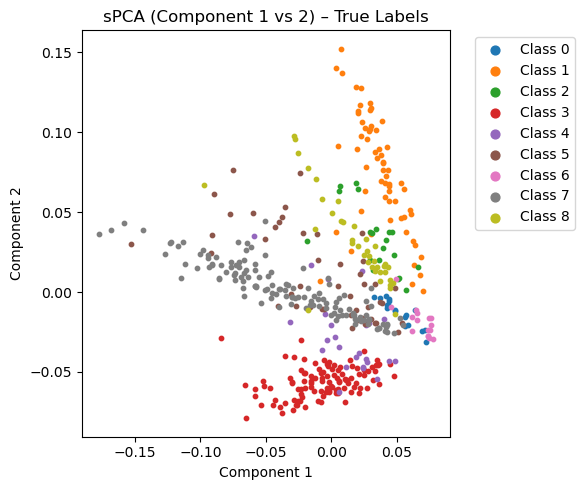

In [68]:
# -----------------------------------------------------------------------------
# 11) (Optional) Scatterplot of the first two sPCA components colored by true label
# -----------------------------------------------------------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
unique_lbls = np.unique(y_filtered)
for lbl in unique_lbls:
    idx = np.where(y_filtered == lbl)[0]
    plt.scatter(Q_spca[idx, 0], Q_spca[idx, 1], s=10, label=f"Class {lbl}")
plt.title("sPCA (Component 1 vs 2) – True Labels")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [41]:
## KNN tPCA ## 
from tPCA import RpLSPCA_cal_projections_KNN

In [42]:
# -----------------------------------------------------------------------------
# 1) Paths to processed files
# -----------------------------------------------------------------------------

BASE_DIR = "/home/m1deng/GSE67835_Processing/GSE67835"
full_x_path      = os.path.join(BASE_DIR, "GSE67835_full_X.csv")
full_labels_path = os.path.join(BASE_DIR, "GSE67835_full_labels.csv")

# -----------------------------------------------------------------------------
# 2) Load gene×cell matrix and labels
# -----------------------------------------------------------------------------

df_full = pd.read_csv(full_x_path, index_col=0)
X_raw   = df_full.values.astype(float)      # (n_genes, n_cells)

labels_df = pd.read_csv(full_labels_path)
y = labels_df["Label"].values              # (n_cells,)

# -----------------------------------------------------------------------------
# 3) Normalize UMI counts to total 1e4 per cell, log-transform
# -----------------------------------------------------------------------------

cell_totals     = np.sum(X_raw, axis=0)       # sum over genes
scaling_factors = 1e4 / cell_totals            # (n_cells,)
X_norm_counts   = X_raw * scaling_factors      # (n_genes, n_cells)

log_X = np.log(X_norm_counts + 1.0)
log_X[log_X < 1e-6] = 0

# -----------------------------------------------------------------------------
# 4) Filter out low-variance genes (keep top 75% variance)
# -----------------------------------------------------------------------------

row_variances   = np.var(log_X, axis=1)
variance_cutoff = np.percentile(row_variances, 25)
keep_mask       = row_variances >= variance_cutoff
X_filtered      = log_X[keep_mask, :]         # (n_filtered_genes, n_cells)

# -----------------------------------------------------------------------------
# 5) Remove cell types with fewer than 15 cells
# -----------------------------------------------------------------------------

unique_classes, class_counts = np.unique(y, return_counts=True)
classes_to_remove = unique_classes[class_counts < 15]
cell_keep_mask   = ~np.isin(y, classes_to_remove)

X_filtered = X_filtered[:, cell_keep_mask]   # (n_filtered_genes, kept_cells)
y_filtered = y[cell_keep_mask]               # (kept_cells,)

# -----------------------------------------------------------------------------
# 6) Standardize across genes (zero-mean, unit-variance)
# -----------------------------------------------------------------------------

scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered.T).T  # (n_filtered_genes, kept_cells)

# -----------------------------------------------------------------------------
# 7) Number of clusters = number of unique labels
# -----------------------------------------------------------------------------

k = np.unique(y_filtered).shape[0]

In [56]:
# -----------------------------------------------------------------------------
# 8) set kNN-tPCA parameters (beta, gamma, zeta1..zeta8)
# -----------------------------------------------------------------------------

beta  = 1000
gamma = 1000000
zeta = np.array([1.0, 0.5, 0.3333333, 0.25, 0.20, 0.16666667, 0.14285714, 0.125])

In [59]:
# -----------------------------------------------------------------------------
# 9) Run kNN-tPCA: get projection matrix PDM (cells × k)
# -----------------------------------------------------------------------------
%time result = sum(range(1000000))

# We choose n_neighbors = 15
n_neighbors = 15

# SPCA_cal_projections_KNN expects input shape (cells, genes), so pass X_scaled.T
PDM = RpLSPCA_cal_projections_KNN(X_scaled.T, beta, gamma, k, n_neighbors, zeta)
PDM = np.asarray(PDM)  # (kept_cells, k)

# Compute transformation matrix TM = (PDM^T PDM)^{-1} PDM^T  (k × kept_cells)
TM = np.linalg.inv(PDM.T @ PDM) @ PDM.T

# Project each cell: (cells × genes_filtered) @ (genes_filtered × k)
# But since PDM is (cells, k), TM.T has shape (cells, k). We project X_scaled.T (cells × genes_filtered) onto subspace:
Q_knntpca = X_scaled.T @ TM.T  # (kept_cells, k)

CPU times: user 44.5 ms, sys: 26 µs, total: 44.5 ms
Wall time: 44.8 ms


In [60]:
# -----------------------------------------------------------------------------
# 10) KMeans on kNN-tPCA embedding (w/gamma = 1000000)
# -----------------------------------------------------------------------------

ARI_vals, NMI_vals, ECS_vals = computeKMeans(Q_knntpca, y_filtered, max_state=30)

print("\n=== kNN-tPCA + KMeans Clustering Results ===")
print(f"Number of clusters (k): {k}")
print(f"kNN-tPCA embedding shape: {Q_knntpca.shape}")
print(f"Adjusted Rand Index (mean over 30 runs): {ARI_vals.mean():.4f}")
print(f"Normalized Mutual Info    (mean over 30 runs): {NMI_vals.mean():.4f}")
print(f"Element-Centric Score     (mean over 30 runs): {ECS_vals.mean():.4f}")


=== kNN-tPCA + KMeans Clustering Results ===
Number of clusters (k): 9
kNN-tPCA embedding shape: (466, 9)
Adjusted Rand Index (mean over 30 runs): 0.5314
Normalized Mutual Info    (mean over 30 runs): 0.6894
Element-Centric Score     (mean over 30 runs): 0.5672


In [55]:
# -----------------------------------------------------------------------------
# 10) KMeans on kNN-tPCA embedding (w/gamma = 100000)
# -----------------------------------------------------------------------------

ARI_vals, NMI_vals, ECS_vals = computeKMeans(Q_knntpca, y_filtered, max_state=30)

print("\n=== kNN-tPCA + KMeans Clustering Results ===")
print(f"Number of clusters (k): {k}")
print(f"kNN-tPCA embedding shape: {Q_knntpca.shape}")
print(f"Adjusted Rand Index (mean over 30 runs): {ARI_vals.mean():.4f}")
print(f"Normalized Mutual Info    (mean over 30 runs): {NMI_vals.mean():.4f}")
print(f"Element-Centric Score     (mean over 30 runs): {ECS_vals.mean():.4f}")


=== kNN-tPCA + KMeans Clustering Results ===
Number of clusters (k): 9
kNN-tPCA embedding shape: (466, 9)
Adjusted Rand Index (mean over 30 runs): 0.5314
Normalized Mutual Info    (mean over 30 runs): 0.6919
Element-Centric Score     (mean over 30 runs): 0.5678


In [51]:
# -----------------------------------------------------------------------------
# 10) KMeans on kNN-tPCA embedding
# -----------------------------------------------------------------------------

ARI_vals, NMI_vals, ECS_vals = computeKMeans(Q_knntpca, y_filtered, max_state=30)

print("\n=== kNN-tPCA + KMeans Clustering Results ===")
print(f"Number of clusters (k): {k}")
print(f"kNN-tPCA embedding shape: {Q_knntpca.shape}")
print(f"Adjusted Rand Index (mean over 30 runs): {ARI_vals.mean():.4f}")
print(f"Normalized Mutual Info    (mean over 30 runs): {NMI_vals.mean():.4f}")
print(f"Element-Centric Score     (mean over 30 runs): {ECS_vals.mean():.4f}")


=== kNN-tPCA + KMeans Clustering Results ===
Number of clusters (k): 9
kNN-tPCA embedding shape: (466, 9)
Adjusted Rand Index (mean over 30 runs): 0.4826
Normalized Mutual Info    (mean over 30 runs): 0.6465
Element-Centric Score     (mean over 30 runs): 0.5456


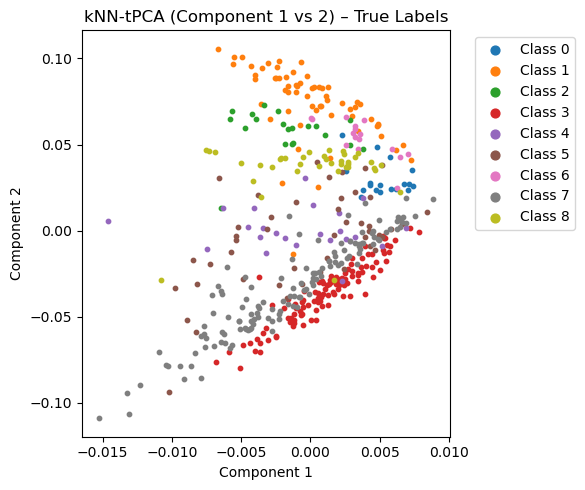

In [52]:
# -----------------------------------------------------------------------------
# 11) (Optional) Scatterplot of first two kNN-tPCA components colored by true labels
# -----------------------------------------------------------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
unique_lbls = np.unique(y_filtered)
for lbl in unique_lbls:
    idx = np.where(y_filtered == lbl)[0]
    plt.scatter(Q_knntpca[idx, 0], Q_knntpca[idx, 1], s=10, label=f"Class {lbl}")
plt.title("kNN-tPCA (Component 1 vs 2) – True Labels")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()